<a href="https://colab.research.google.com/github/Iman-Kalyan-Majumder/FYP/blob/main/HealthMonitoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Using Long Short Term Memory

In [9]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import LSTM, Dense, Input, Dropout
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('BridgeData.csv')

data['Sequence'] = data['Sequence'].apply(lambda x: [float(val) for val in x.strip('[]').split()])
sequences = np.array(data['Sequence'].tolist())
data['Healthy'] = data['Healthy'].astype(int)

max_len = max(len(seq) for seq in sequences)
sequences_padded = tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen=max_len, padding='post', dtype='float32')

X, y = sequences_padded, data['Healthy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=int(len(data)*0.1), shuffle=True, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.reshape(-1, max_len)).reshape(X_train.shape)
X_test_scaled = scaler.transform(X_test.reshape(-1, max_len)).reshape(X_test.shape)

inputs = Input(shape=(max_len, 1))

x = LSTM(units=32, activation='tanh', dropout=0.2, recurrent_dropout=0.2)(inputs)
x = Dense(32, activation='relu')(x)  # Adding an additional dense layer
x = Dropout(0.5)(x)  # Adding dropout for regularization
outputs = Dense(1, activation='sigmoid')(x)

model = Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train_scaled,
    y_train,
    batch_size=32,
    epochs=40,
    validation_split=0.1,
    verbose=1
)

test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


Epoch 1/40
35/35 [==============================] - 19s 441ms/step - loss: 0.7175 - accuracy: 0.4791 - val_loss: 0.7123 - val_accuracy: 0.4344
Epoch 2/40
35/35 [==============================] - 15s 433ms/step - loss: 0.7043 - accuracy: 0.5273 - val_loss: 0.6965 - val_accuracy: 0.5000
Epoch 3/40
35/35 [==============================] - 15s 435ms/step - loss: 0.6884 - accuracy: 0.5883 - val_loss: 0.6824 - val_accuracy: 0.6967
Epoch 4/40
35/35 [==============================] - 16s 464ms/step - loss: 0.6812 - accuracy: 0.6257 - val_loss: 0.6663 - val_accuracy: 0.7869
Epoch 5/40
35/35 [==============================] - 15s 434ms/step - loss: 0.6655 - accuracy: 0.6967 - val_loss: 0.6488 - val_accuracy: 0.8361
Epoch 6/40
35/35 [==============================] - 15s 432ms/step - loss: 0.6481 - accuracy: 0.7477 - val_loss: 0.6274 - val_accuracy: 0.8852
Epoch 7/40
35/35 [==============================] - 15s 435ms/step - loss: 0.6256 - accuracy: 0.7923 - val_loss: 0.5985 - val_accuracy: 0.8934

###Training Accuracy = 97.72% and Test Accuracy = 96.3% for 40 epochs

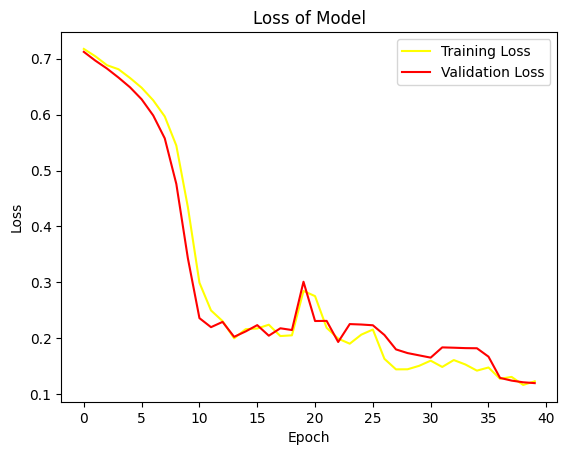

In [10]:
plt.plot(history.history['loss'], label='Training Loss', color='yellow')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.title("Loss of Model")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()
plt.show()

##Using Simple Recurrent Neural Network

In [5]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import SimpleRNN, Dense, Input, Dropout
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('BridgeData.csv')

data['Sequence'] = data['Sequence'].apply(lambda x: [float(val) for val in x.strip('[]').split()])
sequences = np.array(data['Sequence'].tolist())
data['Healthy'] = data['Healthy'].astype(int)

max_len = max(len(seq) for seq in sequences)
sequences_padded = tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen=max_len, padding='post', dtype='float32')

X, y = sequences_padded, data['Healthy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=int(len(data)*0.1), shuffle=True, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.reshape(-1, max_len)).reshape(X_train.shape)
X_test_scaled = scaler.transform(X_test.reshape(-1, max_len)).reshape(X_test.shape)

inputs = Input(shape=(max_len, 1))

x = SimpleRNN(units=32, activation='tanh', dropout=0.2, recurrent_dropout=0.2)(inputs)
x = Dense(32, activation='relu')(x)  # Adding an additional dense layer
x = Dropout(0.5)(x)  # Adding dropout for regularization
outputs = Dense(1, activation='sigmoid')(x)

model = Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train_scaled,
    y_train,
    batch_size=32,
    epochs=50,
    validation_split=0.1,
    verbose=1
)

test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


Epoch 1/50
35/35 [==============================] - 5s 115ms/step - loss: 0.7114 - accuracy: 0.5109 - val_loss: 0.6235 - val_accuracy: 0.4754
Epoch 2/50
35/35 [==============================] - 5s 144ms/step - loss: 0.7043 - accuracy: 0.5000 - val_loss: 0.6138 - val_accuracy: 0.4836
Epoch 3/50
35/35 [==============================] - 4s 104ms/step - loss: 0.7037 - accuracy: 0.5064 - val_loss: 0.6044 - val_accuracy: 0.5164
Epoch 4/50
35/35 [==============================] - 4s 108ms/step - loss: 0.6884 - accuracy: 0.5219 - val_loss: 0.5960 - val_accuracy: 0.5410
Epoch 5/50
35/35 [==============================] - 5s 146ms/step - loss: 0.7049 - accuracy: 0.4945 - val_loss: 0.5874 - val_accuracy: 0.5820
Epoch 6/50
35/35 [==============================] - 4s 108ms/step - loss: 0.6660 - accuracy: 0.5528 - val_loss: 0.5785 - val_accuracy: 0.5820
Epoch 7/50
35/35 [==============================] - 4s 109ms/step - loss: 0.6825 - accuracy: 0.5100 - val_loss: 0.5689 - val_accuracy: 0.5984
Epoch 

###Training Accuracy = 86.61% and Test Accuracy = 86.67% for 50 epochs

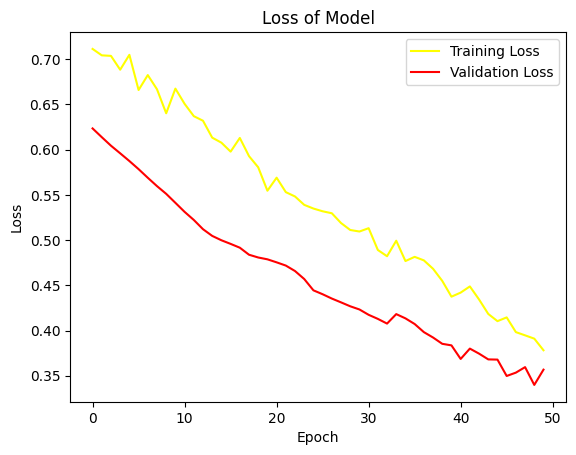

In [6]:
plt.plot(history.history['loss'], label='Training Loss', color='yellow')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.title("Loss of Model")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()
plt.show()

##Using Gated Recurrent Unit

In [7]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import GRU, Dense, Input, Dropout
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('BridgeData.csv')

data['Sequence'] = data['Sequence'].apply(lambda x: [float(val) for val in x.strip('[]').split()])
sequences = np.array(data['Sequence'].tolist())
data['Healthy'] = data['Healthy'].astype(int)

max_len = max(len(seq) for seq in sequences)
sequences_padded = tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen=max_len, padding='post', dtype='float32')

X, y = sequences_padded, data['Healthy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=int(len(data)*0.1), shuffle=True, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.reshape(-1, max_len)).reshape(X_train.shape)
X_test_scaled = scaler.transform(X_test.reshape(-1, max_len)).reshape(X_test.shape)

inputs = Input(shape=(max_len, 1))

x = GRU(units=32, activation='tanh', dropout=0.2, recurrent_dropout=0.2)(inputs)
x = Dense(32, activation='relu')(x)  # Adding an additional dense layer
x = Dropout(0.5)(x)  # Adding dropout for regularization
outputs = Dense(1, activation='sigmoid')(x)

model = Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train_scaled,
    y_train,
    batch_size=32,
    epochs=40,
    validation_split=0.1,
    verbose=1
)

test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


Epoch 1/40
35/35 [==============================] - 16s 385ms/step - loss: 0.6858 - accuracy: 0.4891 - val_loss: 0.6784 - val_accuracy: 0.5574
Epoch 2/40
35/35 [==============================] - 13s 371ms/step - loss: 0.6741 - accuracy: 0.5291 - val_loss: 0.6651 - val_accuracy: 0.5656
Epoch 3/40
35/35 [==============================] - 13s 373ms/step - loss: 0.6646 - accuracy: 0.5537 - val_loss: 0.6524 - val_accuracy: 0.5656
Epoch 4/40
35/35 [==============================] - 13s 370ms/step - loss: 0.6566 - accuracy: 0.5719 - val_loss: 0.6408 - val_accuracy: 0.5902
Epoch 5/40
35/35 [==============================] - 13s 367ms/step - loss: 0.6489 - accuracy: 0.6084 - val_loss: 0.6293 - val_accuracy: 0.6230
Epoch 6/40
35/35 [==============================] - 13s 369ms/step - loss: 0.6429 - accuracy: 0.6120 - val_loss: 0.6183 - val_accuracy: 0.6393
Epoch 7/40
35/35 [==============================] - 13s 370ms/step - loss: 0.6366 - accuracy: 0.6339 - val_loss: 0.6082 - val_accuracy: 0.6721

###Training Accuracy = 95.17% and Test Accuracy = 96.3% for 40 epochs

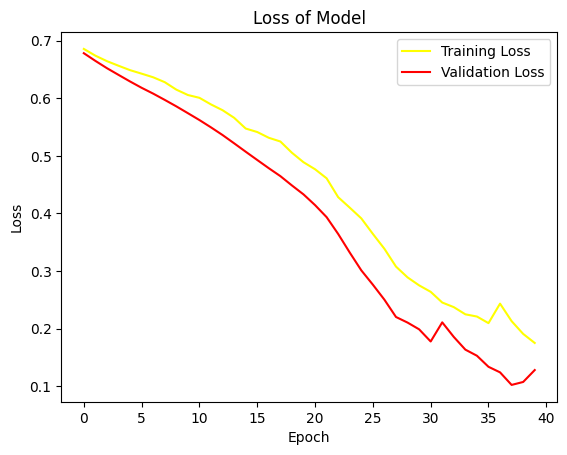

In [8]:
plt.plot(history.history['loss'], label='Training Loss', color='yellow')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.title("Loss of Model")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()
plt.show()

##Sample classification report generation

In [15]:
y_pred = model.predict(X_train_scaled).round().astype(int)

39/39 [==============================] - 2s 60ms/step


In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       604
           1       0.98      0.99      0.98       616

    accuracy                           0.98      1220
   macro avg       0.98      0.98      0.98      1220
weighted avg       0.98      0.98      0.98      1220

